In [1]:
# Análise de Dados Públicos
# Tema: Distribuição de estabelecimentos de saúde públicos e privados no Brasil
# Alunos: Bárbara dos Santos Port e Rafael Furtado Rodrigues dos Santos

In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Lendo os bancos de dados necessários
populaçoes = pd.read_excel(r'Bancos_de_Dados\População\tab1_1.xls')
ceps = pd.read_excel(r'bancos_de_dados/CNES_01_04_2020_banco_estab.xlsx', usecols=["CO_CEP"])

In [4]:
# A função abaixo recebe um numero de amostras para analisar e retorna um dicionário que contêm as UFs e a quantia de estabelecimentos nela
def coletarAmostraEstabsPorUF(fonte):
    chaves = fonte.CO_CEP.keys()
    ufs = {}
    
    # O loop abaixo pega os endereços de cada cep e os guarda
    for chave in chaves:
        cep = str(fonte.CO_CEP.get(chave))
        while len(cep) < 8:  # CEPs antigos tem menos digitos, esse loop corrige isso atualizando eles para 8 digitos
            cep = '0' + cep
        try:
            if int(cep) in  range(69900000, 69999999):
                ufDoEstabelecimento = 'AC'  # Verificando a faixa de CEP e atribuindo um Estado ao local
            elif int(cep) in range(57000000, 57999999):
                ufDoEstabelecimento = 'AL'
            elif int(cep) in range(69000000, 69299999) or int(cep) in range(69400000, 69899999):
                ufDoEstabelecimento = 'AM'
            elif int(cep) in range(68900000, 68999999):
                ufDoEstabelecimento = 'AP'
            elif int(cep) in range(40000000, 48999999):
                ufDoEstabelecimento = 'BA'
            elif int(cep) in range(60000000, 63999999):
                ufDoEstabelecimento = 'CE'
            elif int(cep) in range(70000000, 72799999) or int(cep) in range(73000000, 73699999):
                ufDoEstabelecimento = 'DF'
            elif int(cep) in range(29000000, 29999999):
                ufDoEstabelecimento = 'ES'
            elif int(cep) in range(72800000, 72999999) or int(cep) in range(73700000, 76799999):
                ufDoEstabelecimento = 'GO'
            elif int(cep) in range(65000000, 65999999):
                ufDoEstabelecimento = 'MA'
            elif int(cep) in range(30000000, 39999999):
                ufDoEstabelecimento = 'MG'
            elif int(cep) in range(79000000, 79999999):
                ufDoEstabelecimento = 'MS'
            elif int(cep) in range(78000000, 78899999):
                ufDoEstabelecimento = 'MT'
            elif int(cep) in range(66000000, 68899999):
                ufDoEstabelecimento = 'PA'
            elif int(cep) in range(58000000, 58999999):
                ufDoEstabelecimento = 'PB'
            elif int(cep) in range(50000000, 56999999):
                ufDoEstabelecimento = 'PE'
            elif int(cep) in range(64000000, 64999999):
                ufDoEstabelecimento = 'PI'
            elif int(cep) in range(80000000, 87999999):
                ufDoEstabelecimento = 'PR'
            elif int(cep) in range(20000000, 28999999):
                ufDoEstabelecimento = 'RJ'
            elif int(cep) in range(59000000, 59999999):
                ufDoEstabelecimento = 'RN'
            elif int(cep) in range(76800000, 76999999):
                ufDoEstabelecimento = 'RO'
            elif int(cep) in range(69300000, 69399999):
                ufDoEstabelecimento = 'RR'
            elif int(cep) in range(90000000, 99999999):
                ufDoEstabelecimento = 'RS'
            elif int(cep) in range(88000000, 89999999):
                ufDoEstabelecimento = 'SC'
            elif int(cep) in range(49000000, 49999999):
                ufDoEstabelecimento = 'SE'
            elif int(cep) in range(1000000, 19999999):
                ufDoEstabelecimento = 'SP'
            else:
                ufDoEstabelecimento = 'TO'
        except:
            print(cep)
            raise
        # A condicional a seguir avalia se o estado já existe nas UFs, caso não exista ele adiciona, caso exista soma mais um estabelecimento ao Estado
        if ufDoEstabelecimento not in ufs:
            ufs[ufDoEstabelecimento] = 1
        else:
            ufs[ufDoEstabelecimento] += 1

    return ufs

amostragem = coletarAmostraEstabsPorUF(ceps)

In [5]:
# Função que retorna uma lista com 2 dicionários, um por região e outro por Estado
def obterPopulaçoes(populaçao = populaçoes):
    'Retorna uma lista com 2 dicionários, um por região e outro por estado'
    'Pode ser chamada sem passar um parâmetro'
    
    # Váriaveis que serão usadas no loop logo abaixo
    pop = {}
    caracteresEspeciais = [' ', '(', ')', '1', '2', '3']
    populaçaoPorRegiao = {}
    populaçaoPorEstado = {}
    regioes = ['Brasil', 'Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

    # Loop para ler as populações do Brasil e filtrar/organizar as informações
    for linha in range(0, len(populaçao.index)):

        
        if str(populaçao.loc[linha, 'Unnamed: 4']) == 'nan':  # Verifica se existe a informação inválida 'nan' na chave, caso exista, não adiciona a linha
            continue  # Continue faz o loop pular para a próxima iteração, sem executar o que está abaixo
        else:  # Caso não contenha 'nan', realiza os procedimentos abaixo
            correçao = populaçao.loc[linha, 'Unnamed: 0']  # Pega o nome do Estado/região
            for especial in caracteresEspeciais:  # Loop para tirar sujeiras do nome
                correçao = correçao.replace(especial, '')  # Troca a sujeira por ''

            # Depois de limpar a sujeira, adiciona o nome da região/Estado a um novo dicionário, com o seu valor da população
            pop[correçao] = int(populaçao.loc[linha, 'Unnamed: 4'])

            # Filtra os estados/regiões, adicionando cada um em um respectivo dicionário
            if correçao in regioes:
                populaçaoPorRegiao[correçao] = pop[correçao]
            else:
                if correçao == 'Acre':
                    uf = 'AC'
                elif correçao == 'Alagoas':
                    uf = 'AL'
                elif correçao == 'Amapá':
                    uf = 'AP'
                elif correçao == 'Amazonas':
                    uf = 'AM'
                elif correçao == 'Bahia':
                    uf = 'BA'
                elif correçao == 'Ceará':
                    uf = 'CE'
                elif correçao == 'DistritoFederal':
                    uf = 'DF'
                elif correçao == 'EspíritoSanto':
                    uf = 'ES'
                elif correçao == 'Goiás':
                    uf = 'GO'
                elif correçao == 'Maranhão':
                    uf = 'MA'
                elif correçao == 'MatoGrosso':
                    uf = 'MT'
                elif correçao == 'MatoGrossodoSul':
                    uf = 'MS'
                elif correçao == 'MinasGerais':
                    uf = 'MG'
                elif correçao == 'Paraná':
                    uf = 'PA'
                elif correçao == 'Paraíba':
                    uf = 'PB'
                elif correçao == 'Pará':
                    uf = 'PR'
                elif correçao == 'Pernambuco':
                    uf = 'PE'
                elif correçao == 'Piauí':
                    uf = 'PI'
                elif correçao == 'RioGrandedoNorte':
                    uf = 'RN'
                elif correçao == 'RioGrandedoSul':
                    uf = 'RS'
                elif correçao == 'RiodeJaneiro':
                    uf = 'RJ'
                elif correçao == 'Rondônia':
                    uf = 'RO'
                elif correçao == 'Roraima':
                    uf = 'RR'
                elif correçao == 'SantaCatarina':
                    uf = 'SC'
                elif correçao == 'Sergipe':
                    uf = 'SE'
                elif correçao == 'SãoPaulo':
                    uf = 'SP'
                else:
                    uf = 'TO'
                    
                populaçaoPorEstado[uf] = pop[correçao]

    return [populaçaoPorRegiao, populaçaoPorEstado]


In [6]:
# A função abaixo organiza o dicionário de populações, retornando uma lista com as UFs e populações na ordem crescente
def organizarPorMaior(dicionarioComPop):
    uf = []
    inversao = {v: k for k, v in dicionarioComPop.items()}  # Inverte as chaves pelos valores
    populaçoes = sorted(inversao)
    for total in populaçoes:
        uf.append(inversao[total])
        
    return [uf, populaçoes]  # UFs no indice 0 da lista, populações da UF no indice 1, em ordem


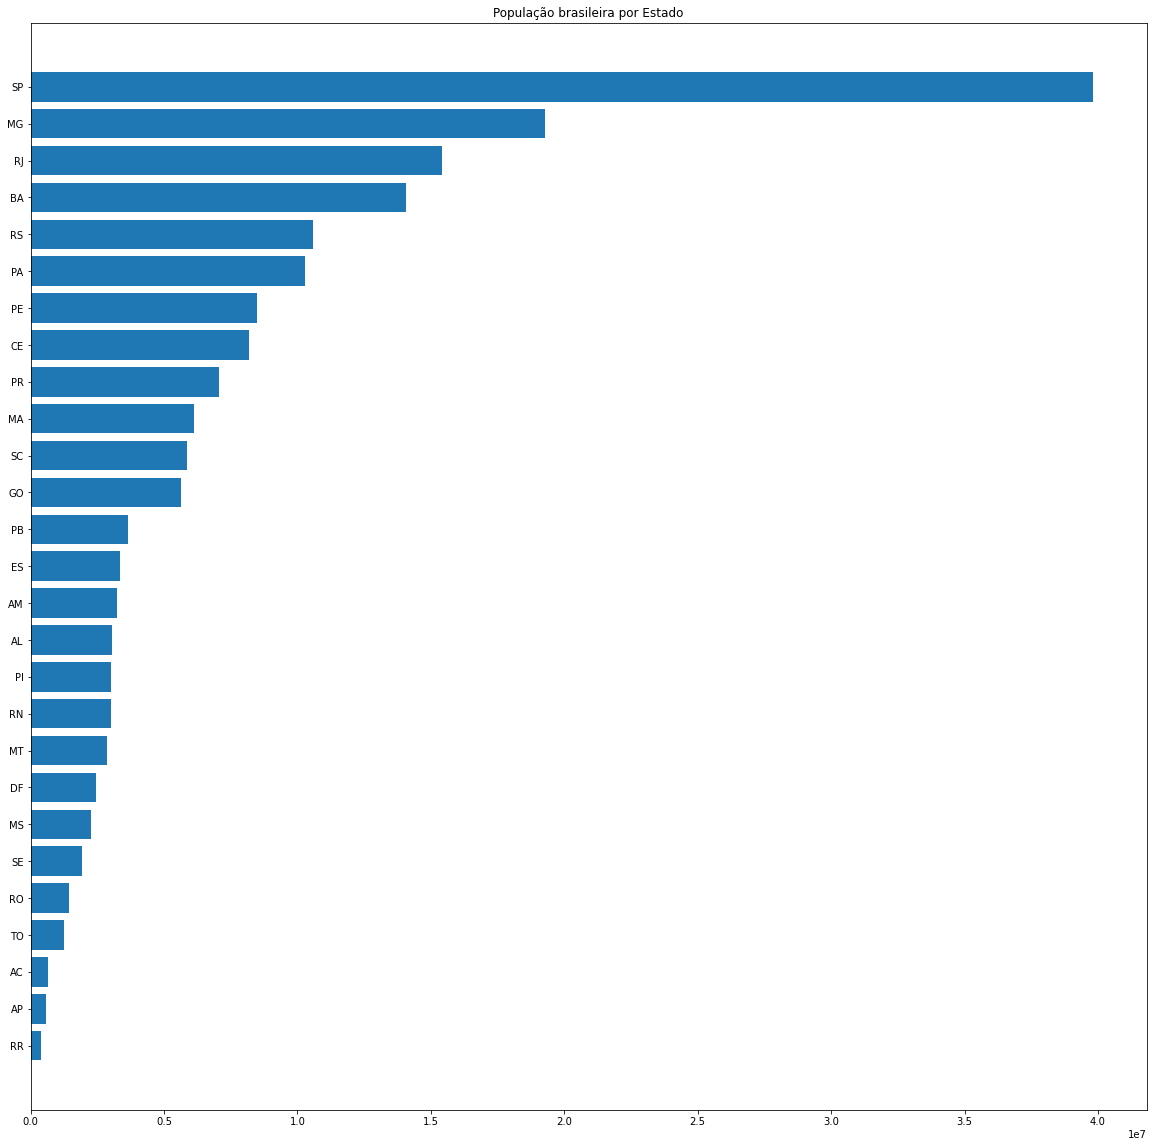

In [12]:
# Gráfico de barras exibindo a população brasileira por Estado
populaçao = obterPopulaçoes()
dadosOrganizadosPop = organizarPorMaior(populaçao[1])

plt.barh(dadosOrganizadosPop[0], dadosOrganizadosPop[1])
plt.rcParams['figure.figsize'] = (15,15)
plt.title('População brasileira por Estado')

plt.show() # Quando o gráfica é exibido no eixo X há "le7". Isso significa que é o valor (de 0 a 4) seguido de mais 7 zeros (aproximação).

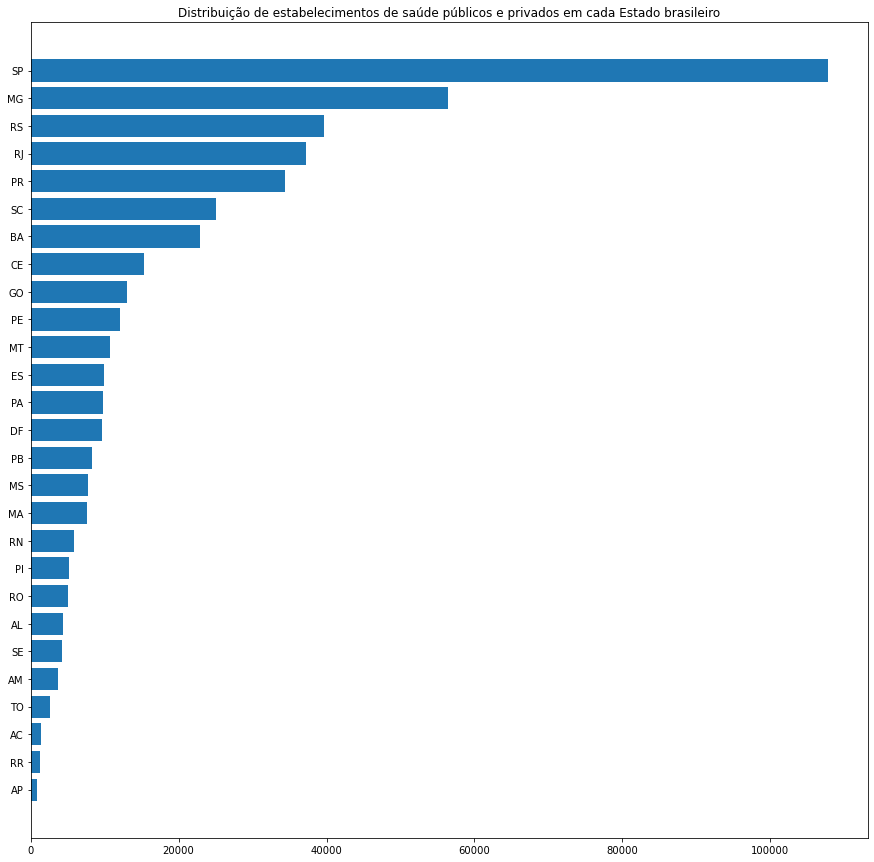

In [8]:
# Gráfico de barras que mostra a quantia de estabelecimentos de saúde em cada Estado
dadosOrganizados = organizarPorMaior(amostragem)
plt.barh(dadosOrganizados[0], dadosOrganizados[1])
plt.rcParams['figure.figsize'] = (20, 20) # ajustando tamanho do gráfico
plt.title('Distribuição de estabelecimentos de saúde públicos e privados em cada Estado brasileiro') # título do gráfico
plt.show()


In [9]:
dfAmostragem = pd.DataFrame({'Estados': dadosOrganizados[0], 'Estabelecimentos': dadosOrganizados[1], 'População': dadosOrganizadosPop[1]}) # DataFrame para mostrar os estabelecimentos e população exatos
dfAmostragem

,Estados,Estabelecimentos,População
0,AP,859,395725
1,RR,1325,587311
2,AC,1371,655385
3,TO,2686,1243627
4,AM,3658,1453756
5,SE,4314,1939426
6,AL,4319,2265274
7,RO,5091,2455903
8,PI,5155,2854642
9,RN,5849,3013740


In [10]:
por100milHabs = []
for indice in range(0, len(dadosOrganizadosPop[1])):
    por100milHabs.append(int((dadosOrganizados[1][indice]/dadosOrganizadosPop[1][indice]) * 100000))

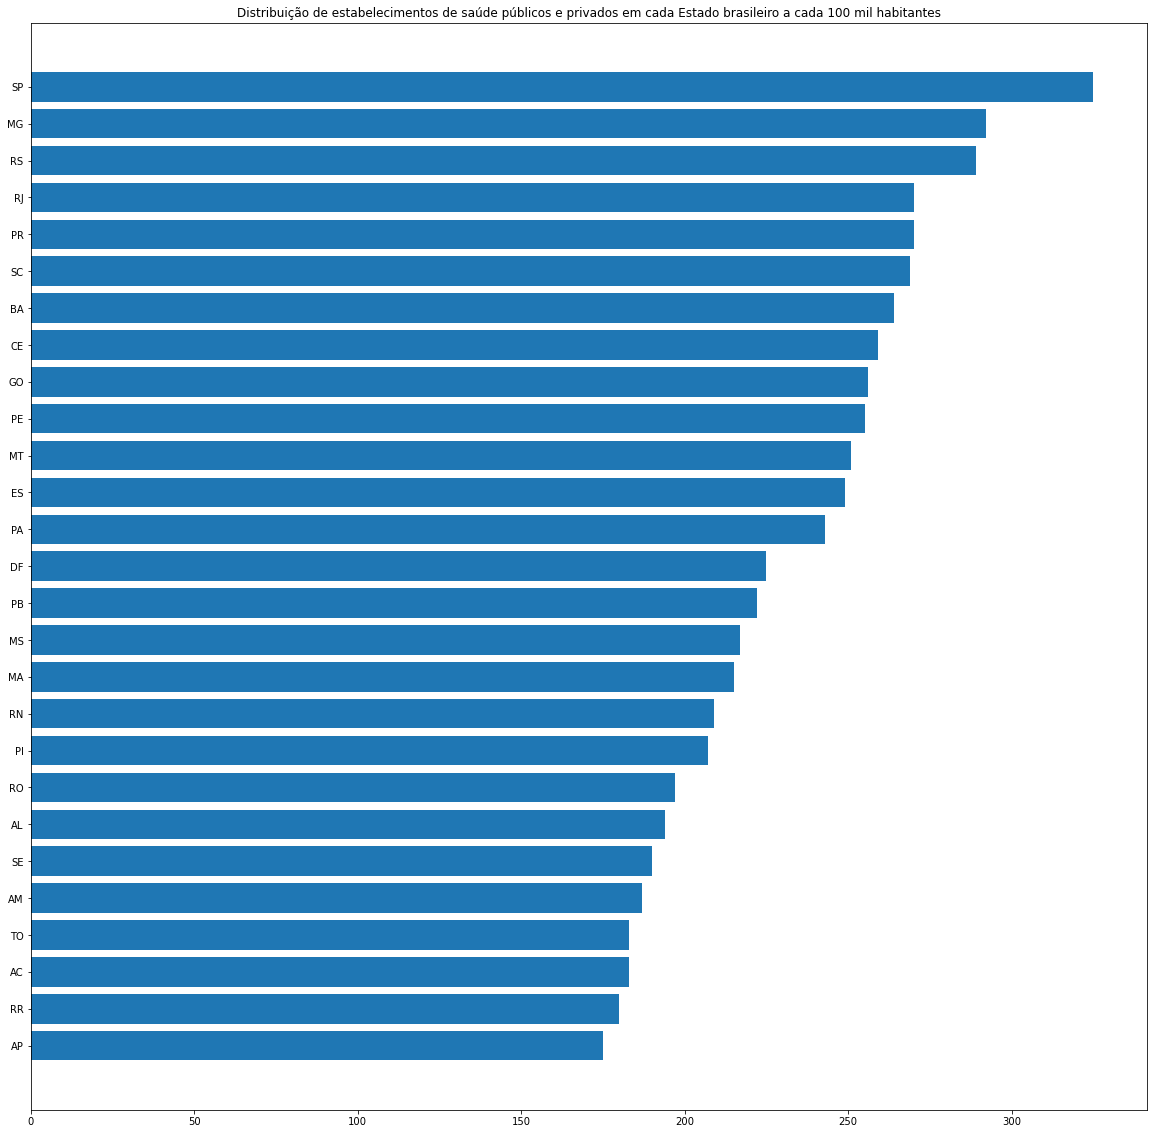

In [11]:
# Gráfico de barras que mostra a quantia de estabelecimentos de saúde em cada Estado
dadosOrganizados = organizarPorMaior(amostragem)
plt.barh(dadosOrganizados[0], sorted(por100milHabs)) # sorted para organizar do maior ao menor
plt.rcParams['figure.figsize'] = (20, 20) #ajustando tamanho do gráfico
plt.title('Distribuição de estabelecimentos de saúde públicos e privados em cada Estado brasileiro a cada 100 mil habitantes') #título do gráfico
plt.show()